# Create environment figures

In [2]:
from __future__ import annotations

from pathlib import Path
from typing import TYPE_CHECKING

import numpy as np

import matplotlib
from matplotlib import pyplot as plt
from PIL import Image

from drone_grid_env.utils.plots import sim2matplotlib, _remove_all_axes
from drone_grid_env.envs.utils import center_crop, get_file
from drone_grid_env.envs.drone_grid_env import DroneGridEnv, ActionSpace

if TYPE_CHECKING:
    from typing import Any

    from numpy.typing import NDArray
    from matplotlib.figure import Figure
    from matplotlib.axes import Axes
    from pygame import Color

matplotlib.rcParams["text.usetex"] = True

%matplotlib inline

Create some plotting functions:

In [3]:
def _save_fig(path: str | Path, fig: Figure, **kwargs: dict[str, Any]) -> None:
    if not isinstance(path, Path):
        path = Path(path)

    if not path.parent.is_dir():
        path.parent.mkdir(parents=True)

    fig.savefig(path, **kwargs)


def _save_subfig(path: str | Path, fig: Figure, ax: plt.Axes, pad: float = 0.1) -> None:
    bbox = ax.get_tightbbox(fig.canvas.get_renderer())
    bbox = bbox.expanded(1.0 + pad, 1.0 + pad)
    _save_fig(path, fig, bbox_inches=bbox.transformed(fig.dpi_scale_trans.inverted()))


def _do_steps(env: DroneGridEnv, actions: list[ActionSpace]) -> None:
    for action in actions:
        env.step(action)


def _plot_image(image: NDArray[np.uint8], ax: plt.Axes, **kwargs: dict[str, Any]) -> None:
    ax.imshow(image, **kwargs)
    ax.axis("off")


def _color_to_tuple(color: Color) -> tuple[int, int, int]:
    return (color.r, color.g, color.b)

## Simulation images

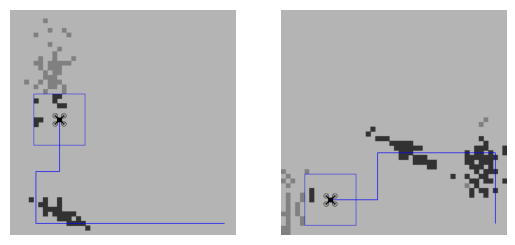

In [6]:
env_1 = DroneGridEnv(render_mode="rgb_array_headless", config_file=get_file("experiments/distributions/env_config_strong.yaml"))
env_2 = DroneGridEnv(render_mode="rgb_array_headless", config_file=get_file("experiments/distributions/env_config_strong.yaml"))

env_1.reset(seed=123)
env_2.reset(seed=1516)

actions_1 = [
    *(40 * [ActionSpace.FLY_WEST]),
    *(11 * [ActionSpace.FLY_NORTH]),
    *(5 * [ActionSpace.FLY_EAST]),
    *(11 * [ActionSpace.FLY_NORTH]),
]
actions_2 = [
    *(15 * [ActionSpace.FLY_NORTH]),
    *(25 * [ActionSpace.FLY_WEST]),
    *(10 * [ActionSpace.FLY_SOUTH]),
    *(10 * [ActionSpace.FLY_WEST]),
]

_do_steps(env_1, actions_1)
_do_steps(env_2, actions_2)

f, axarr = plt.subplots(1, 2)
sim2matplotlib(env_1, axarr[0])
sim2matplotlib(env_2, axarr[1])

_save_subfig("figures/simulation_1.pdf", f, axarr[0])
_save_subfig("figures/simulation_2.pdf", f, axarr[1])

plt.show()

## Local and global map

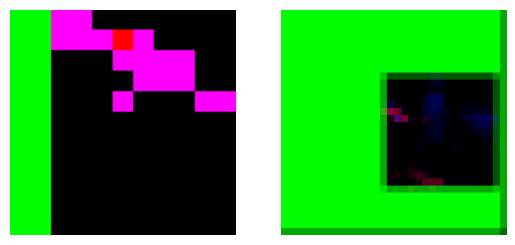

In [ ]:
env = DroneGridEnv(render_mode="rgb_array_headless", config_file=get_file("experiments/distributions/env_config_strong.yaml"))
env.reset(seed=101112)

actions = [
    *(40 * [ActionSpace.FLY_WEST]),
    *(11 * [ActionSpace.FLY_NORTH]),
    *(6 * [ActionSpace.FLY_EAST]),
    *(15 * [ActionSpace.FLY_NORTH]),
    *(8 * [ActionSpace.FLY_WEST]),
]
_do_steps(env, actions)

local_map_image = env._last_state["local_map"].transpose(1, 2, 0)
global_map_image = env._last_state["global_map"].transpose(1, 2, 0)

# Upsample output to create nice image
UPSAMPLING_FACTOR = 10
local_map_image_upsampled = np.repeat(np.repeat(local_map_image, UPSAMPLING_FACTOR, axis=0), UPSAMPLING_FACTOR, axis=1)
global_map_image_upsampled = np.repeat(np.repeat(global_map_image, UPSAMPLING_FACTOR, axis=0), UPSAMPLING_FACTOR, axis=1)

f, axarr = plt.subplots(1, 2)
axarr[0].axis("off")
axarr[1].axis("off")
axarr[0].imshow(local_map_image_upsampled[..., ::-1])
axarr[1].imshow(global_map_image_upsampled[..., ::-1])

_save_subfig("figures/local_map.pdf", f, axarr[0])
_save_subfig("figures/global_map.pdf", f, axarr[1])

plt.show()

## Distributions

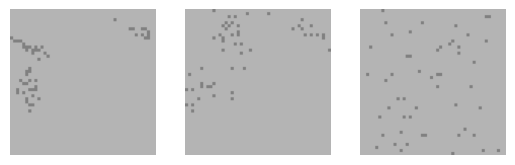

In [ ]:
env_strong = DroneGridEnv(render_mode="rgb_array_headless", config_file=get_file("experiments/distributions/env_config_strong.yaml"))
env_medium = DroneGridEnv(render_mode="rgb_array_headless", config_file=get_file("experiments/distributions/env_config_medium.yaml"))
env_random = DroneGridEnv(render_mode="rgb_array_headless", config_file=get_file("experiments/distributions/env_config_random.yaml"))

SEED = 1234
env_strong.reset(seed=SEED)
env_medium.reset(seed=SEED)
env_random.reset(seed=SEED)

f, axarr = plt.subplots(1, 3)
sim2matplotlib(env_strong, axarr[0], plot_drone=False)
sim2matplotlib(env_medium, axarr[1], plot_drone=False)
sim2matplotlib(env_random, axarr[2], plot_drone=False)

_save_subfig("figures/distributions/distribution_strong.pdf", f, axarr[0])
_save_subfig("figures/distributions/distribution_medium.pdf", f, axarr[1])
_save_subfig("figures/distributions/distribution_random.pdf", f, axarr[2])

plt.show()

## Detection errors

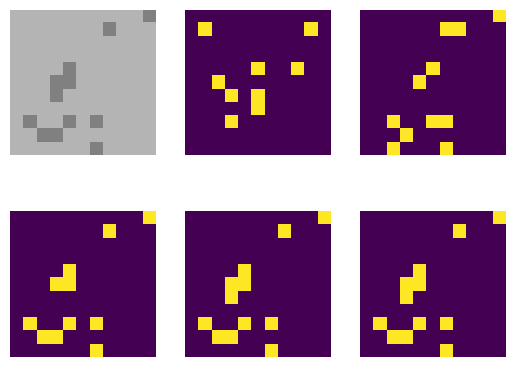

In [ ]:
env_level_0 = DroneGridEnv(render_mode="rgb_array_headless", config_file=get_file("experiments/detection_errors/env_config_level_0.yaml"))
env_level_1 = DroneGridEnv(render_mode="rgb_array_headless", config_file=get_file("experiments/detection_errors/env_config_level_1.yaml"))
env_level_2 = DroneGridEnv(render_mode="rgb_array_headless", config_file=get_file("experiments/detection_errors/env_config_level_2.yaml"))
env_level_3 = DroneGridEnv(render_mode="rgb_array_headless", config_file=get_file("experiments/detection_errors/env_config_level_3.yaml"))
env_level_4 = DroneGridEnv(render_mode="rgb_array_headless", config_file=get_file("experiments/detection_errors/env_config_level_4.yaml"))

SEED = 1234
env_level_0.reset(seed=SEED)
env_level_1.reset(seed=SEED)
env_level_2.reset(seed=SEED)
env_level_3.reset(seed=SEED)
env_level_4.reset(seed=SEED)

# Imitate environment plot (level 4 has no uncertainty)
gt = env_level_4.world.create_observation([20, 7], env_level_4.drone.fov)
gt_img = np.zeros((*gt.shape, 3), dtype=np.uint8)
gt_img[gt == 0.0] = _color_to_tuple(env_level_4.rendering.config.background_color)
gt_img[gt == 1.0] = _color_to_tuple(env_level_4.rendering.config.object_color)
gt_img = center_crop(gt_img, env_level_4.drone.fov, first_axis=False)

f, axarr = plt.subplots(2, 3)
axarr[1, 2]
_plot_image(gt_img, axarr[0, 0])
_plot_image(env_level_0.world.create_observation([20, 7], env_level_0.drone.fov), axarr[0, 1], cmap="viridis", vmin=0.0, vmax=1.0)
_plot_image(env_level_1.world.create_observation([20, 7], env_level_1.drone.fov), axarr[0, 2], cmap="viridis", vmin=0.0, vmax=1.0)
_plot_image(env_level_2.world.create_observation([20, 7], env_level_2.drone.fov), axarr[1, 0], cmap="viridis", vmin=0.0, vmax=1.0)
_plot_image(env_level_3.world.create_observation([20, 7], env_level_3.drone.fov), axarr[1, 1], cmap="viridis", vmin=0.0, vmax=1.0)
_plot_image(env_level_4.world.create_observation([20, 7], env_level_4.drone.fov), axarr[1, 2], cmap="viridis", vmin=0.0, vmax=1.0)

_save_subfig("figures/detection_errors/detection_levels_gt.pdf", f, axarr[0, 0])
_save_subfig("figures/detection_errors/detection_levels_0.pdf", f, axarr[0, 1])
_save_subfig("figures/detection_errors/detection_levels_1.pdf", f, axarr[0, 2])
_save_subfig("figures/detection_errors/detection_levels_2.pdf", f, axarr[1, 0])
_save_subfig("figures/detection_errors/detection_levels_3.pdf", f, axarr[1, 1])
_save_subfig("figures/detection_errors/detection_levels_4.pdf", f, axarr[1, 2])

plt.show()

## Prior knowledge quality

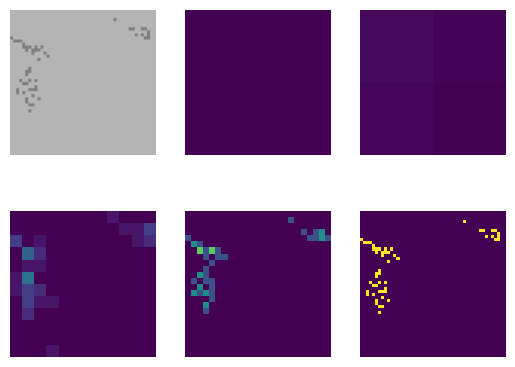

In [ ]:
env_level_0 = DroneGridEnv(
    render_mode="rgb_array_headless", config_file=get_file("experiments/prior_knowledge_quality/env_config_level_0.yaml")
)
env_level_1 = DroneGridEnv(
    render_mode="rgb_array_headless", config_file=get_file("experiments/prior_knowledge_quality/env_config_level_1.yaml")
)
env_level_2 = DroneGridEnv(
    render_mode="rgb_array_headless", config_file=get_file("experiments/prior_knowledge_quality/env_config_level_2.yaml")
)
env_level_3 = DroneGridEnv(
    render_mode="rgb_array_headless", config_file=get_file("experiments/prior_knowledge_quality/env_config_level_3.yaml")
)
env_level_4 = DroneGridEnv(
    render_mode="rgb_array_headless", config_file=get_file("experiments/prior_knowledge_quality/env_config_level_4.yaml")
)

SEED = 1234
env_level_0.reset(seed=SEED)
env_level_1.reset(seed=SEED)
env_level_2.reset(seed=SEED)
env_level_3.reset(seed=SEED)
env_level_4.reset(seed=SEED)

f, axarr = plt.subplots(2, 3)
sim2matplotlib(env_level_0, axarr[0, 0], plot_drone=False)
_plot_image(env_level_0.world.prior_knowledge, axarr[0, 1], cmap="viridis", vmin=0, vmax=255)
_plot_image(env_level_1.world.prior_knowledge, axarr[0, 2], cmap="viridis", vmin=0, vmax=255)
_plot_image(env_level_2.world.prior_knowledge, axarr[1, 0], cmap="viridis", vmin=0, vmax=255)
_plot_image(env_level_3.world.prior_knowledge, axarr[1, 1], cmap="viridis", vmin=0, vmax=255)
_plot_image(env_level_4.world.prior_knowledge, axarr[1, 2], cmap="viridis", vmin=0, vmax=255)

_save_subfig("figures/prior_knowledge_quality/prior_knowledge_levels_world.pdf", f, axarr[0, 0])
_save_subfig("figures/prior_knowledge_quality/prior_knowledge_levels_0.pdf", f, axarr[0, 1])
_save_subfig("figures/prior_knowledge_quality/prior_knowledge_levels_1.pdf", f, axarr[0, 2])
_save_subfig("figures/prior_knowledge_quality/prior_knowledge_levels_2.pdf", f, axarr[1, 0])
_save_subfig("figures/prior_knowledge_quality/prior_knowledge_levels_3.pdf", f, axarr[1, 1])
_save_subfig("figures/prior_knowledge_quality/prior_knowledge_levels_4.pdf", f, axarr[1, 2])

plt.show()

## Real-world dataset

In [35]:
def plot_img_with_zoom_section(image_path: Path, x1: float, x2: float, y1: float, y2: float, ax: Axes | None = None) -> None:
    img = np.asarray(Image.open(image_path))

    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 5))

    extent = (-3, 4, -4, 3)

    ax.imshow(img, extent=extent, origin="lower", aspect="auto")

    axins = ax.inset_axes((0.5, 0.5, 0.47, 0.47), xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
    axins.imshow(img, extent=extent, origin="lower")
    axins.xaxis.set_visible(False)
    axins.yaxis.set_visible(False)
    for spine in axins.spines.values():
        spine.set_color("white")

    ax.indicate_inset_zoom(axins, edgecolor="white", linewidth=1.0, alpha=1.0)

    _remove_all_axes(ax)

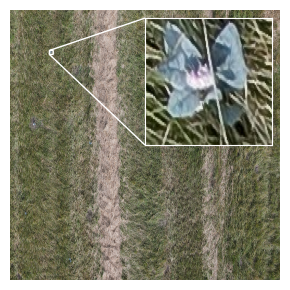

In [36]:
img = get_file("$DATA_HOME/20240718_clustered_3/DJI_202407180944_041_RickBennekomCluster12m/DJI_20240718095502_0324.JPG")

fig, ax = plt.subplots(figsize=(3, 3))

plot_img_with_zoom_section(img, -1.98, -1.88, 1.85, 1.95, ax=ax)

fig.tight_layout()
_save_fig("figures/example_annotation_zoom.pdf", fig, format="pdf", dpi=300, bbox_inches="tight", pad_inches=0)
plt.show()

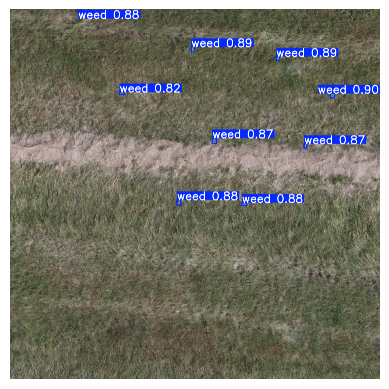

In [37]:
env = DroneGridEnv(render_mode="rgb_array_headless", config_file=get_file("experiments/showcase/clustered_3.yaml"))
env.drone.flight_path.add(np.array([12, 18], dtype=np.uint16))
env.world.detection_network.model.names.update({0: "weed", 1: "weed"})  # Update labels for plot
env.step(ActionSpace.FLY_EAST)

f, ax = plt.subplots()
ax.imshow(env.world.additional_visualisation)
ax.axis("off")
_save_fig("figures/drone_detection.png", f, bbox_inches="tight", pad_inches=0, dpi=300)

plt.show()


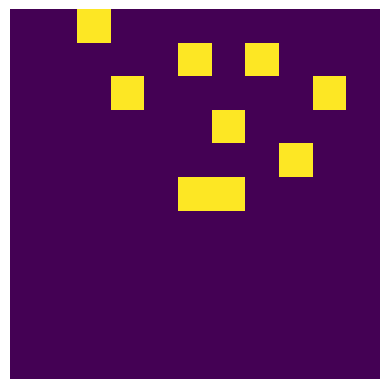

In [38]:
f, ax = plt.subplots()
ax.imshow(env._last_state["local_map"][0, :, :], cmap="viridis", vmin=0, vmax=255)
ax.axis("off")
_save_fig("figures/drone_object_map.png", f, bbox_inches="tight", pad_inches=0)
plt.show()

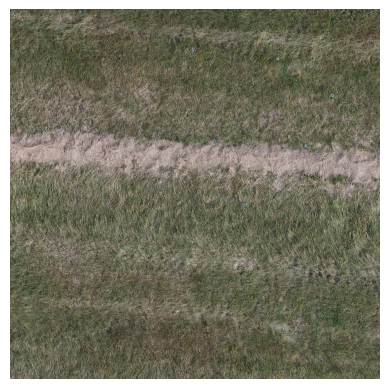

In [39]:
utm_coordinate = env.world.convert_local_to_utm(env.drone.flight_path.current_position.reshape(-1, 2))[0, :]
fov_m = tuple(np.array([11, 11], dtype=np.float32) * env.world.config.scale)
image = env.world.orthomosaic_loader.get_image_at_coordinate(
    utm_coordinate, -env.world.config.rotation, env.world.config.camera_size, fov_m
)

f, ax = plt.subplots()
ax.imshow(image)
ax.axis("off")
_save_fig("figures/drone_image.png", f, bbox_inches="tight", pad_inches=0, dpi=300)
plt.show()